# loading the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
import matplotlib.pyplot as plt

loading the dataset

In [2]:
df=pd.read_csv('bigdatamart_train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


the top 5 rows in the dataset
description of the dataframe:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. A prdictive model will be built to predict the sales of each product at a particular store. in the dataset, the target variable is the Item_Outlet_Sales and the rest are independent features. 

In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


the bottom 5 rows in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.shape

(8523, 12)

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

observation: in the dataset, object type columns are Item_Identifier , Item_Fat_Content, Item_Type,Outlet_Identifier  ,  observation: in the dataset, object type columns are Item_Identifier, Item_Fat_Content, Item_Type,Outlet_Identifier, and the rest are of numeric type  

the dataset has 8523 rows and 12 columns

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

in this dataset, the item weight column has 1463 null values and the outlet size column has 2410 null values

the null values needs to be replaced using the Simple Imputation

# Imputation

In [12]:
from sklearn.impute import SimpleImputer

In [14]:
imp=SimpleImputer(missing_values=np.NaN,strategy="mean")

In [15]:
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))

In [18]:
df['Item_Weight'].isnull().sum()

0

thus, the null values have been replaced by the mean value in the column

In [19]:
impu=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

In [20]:
df['Outlet_Size']=impu.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

In [21]:
df['Outlet_Size'].isnull().sum()

0

the null values have been replaced by the most frequent values

In [22]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [30]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [31]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [32]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [34]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [35]:
df["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [36]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [37]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

# Label Encoder

label encoding technique is used to convert object datatype into numeric data type for drawing of useful insights

In [24]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()
val=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Type','Outlet_Location_Type']

In [39]:
for i in val:
    df[i]=le.fit_transform(df[i].astype(str))

In [119]:
df["Item_Identifier"]=le.fit_transform(df["Item_Identifier"].astype(str))

In [120]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


# Descriptive statistics

In [41]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


observation: no skewness is present in any of the columns

to check for correlation between the columns

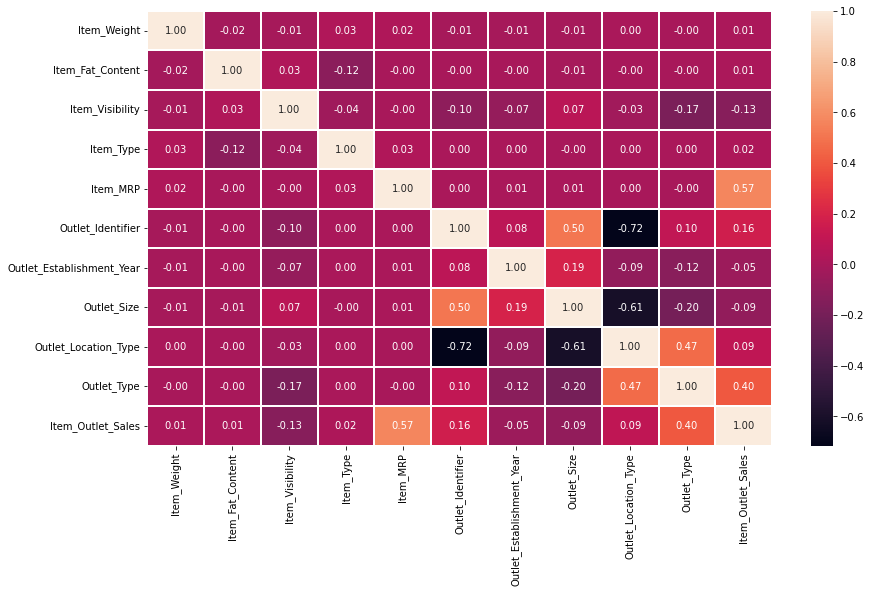

In [43]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,fmt="0.2f")
plt.show()

In [44]:
df.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Fat_Content             0.009800
Item_Weight                  0.011550
Item_Type                    0.017048
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

the correlation of the independent features with the target column is between +/-0.5
since, Outlet_Establishment_Year has correlation close to 0, it can be dropped.   

In [113]:
# conversion of item_identifier to categorical type
df.Item_Identifier = df.Item_Identifier.astype('category')

In [122]:
x=df.drop(["Item_Outlet_Sales",],axis=1)
y=df["Item_Outlet_Sales"]

## univariate and bivariate analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

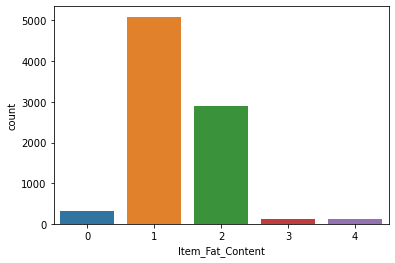

In [82]:
sns.countplot(df["Item_Fat_Content"])

observation: it can be identified that there are 4 different types of Item_Fat_content and the majority is of type 1 and 2

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

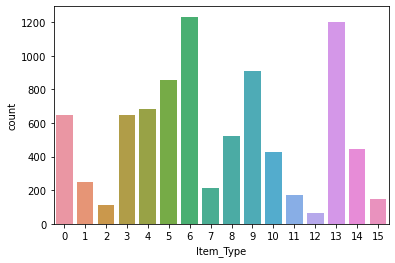

In [83]:
sns.countplot(df["Item_Type"])

observation: it can be identified that there are 15 different types of Item_Type

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

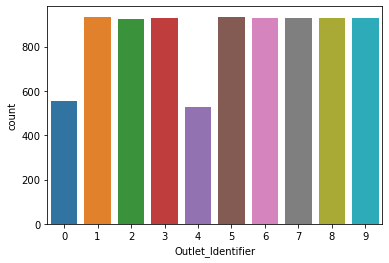

In [85]:
sns.countplot(df["Outlet_Identifier"])

observation: it can be identified that there are 9 different types of Outlet_identifier

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

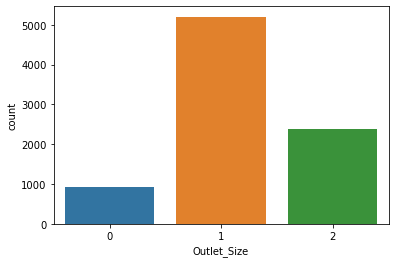

In [86]:
sns.countplot(df["Outlet_Size"])

observation: it can be identified that there are 3 different types of Outlet_size and the majority is of type 1 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

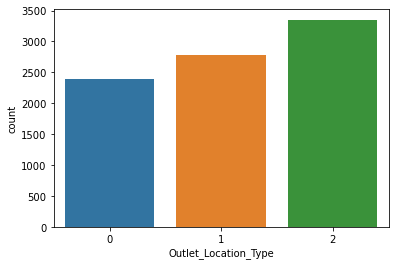

In [87]:
sns.countplot(df["Outlet_Location_Type"])

observation: it can be identified that there are 3 different types of outlet_location_type 

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

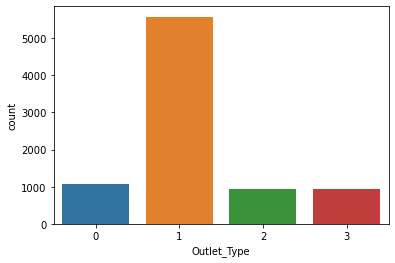

In [88]:
sns.countplot(df["Outlet_Type"])

observation: it can be identified that there are 4 different types of outlet type and the majority is of type 1 

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

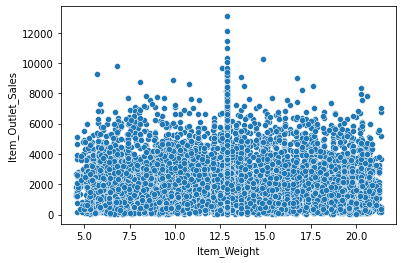

In [98]:
sns.scatterplot(data=df,x="Item_Weight",y="Item_Outlet_Sales")

observation: items with itemweight between 5 to 20 kg have outlet sales between 0 to 8000 but the maximum sales of 12000 is for the item weight of 13.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

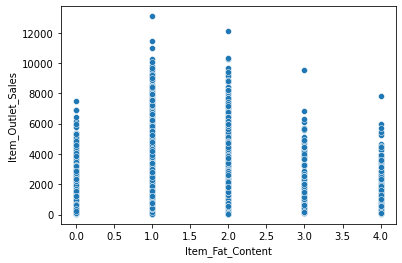

In [99]:
sns.scatterplot(data=df,x="Item_Fat_Content",y="Item_Outlet_Sales")

observation: item with fat content 0 has outlet sales of close to 8000, item with fat content 1 has outlet sales of close to 12000, item with fat content of 2 units has outlet sales of close to 11000, item with fat content 3 units has outlet sales of close to 7000 and item with fat content 4 units has outlet sales of close to 6000

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

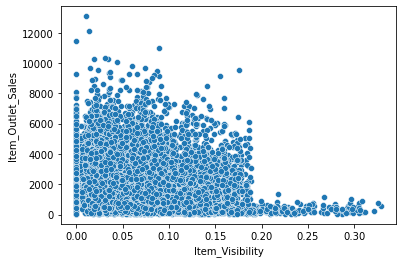

In [101]:
sns.scatterplot(data=df,x="Item_Visibility",y="Item_Outlet_Sales")

observation: items of visibility between 0 to 019 have the maximum outlet sales, while item with item_visibility more than 0.20 have sales less than 2000. 

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

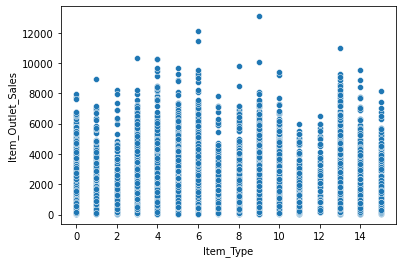

In [102]:
sns.scatterplot(data=df,x="Item_Type",y="Item_Outlet_Sales")

observation: 
item type 0 has maximum sales of 8000
item type 1 has maximum sales of 7000
item type 2 has maximum sales of 8250
item type 3 has maximum sales of 8300
item type 4 has maximum sales of 10500
item type 5 has maximum sales of 10000
item type 6 has maximum sales of 12000
item type 7 has maximum sales of 7000
item type 8 has maximum sales of 9000
item type 9 has maximum sales of 13000
item type 10 has maximum sales of 9000
item type 11 has maximum sales of 6000
item type 12 has maximum sales of 7000
item type 13 has maximum sales of 11000
item type 14 has maximum sales of 10000
item type 15 has maximum sales of 8000


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

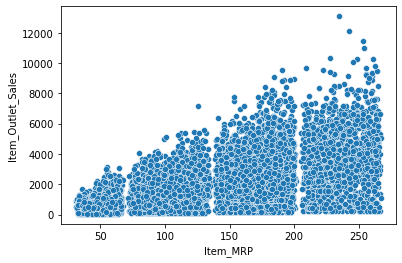

In [103]:
sns.scatterplot(data=df,x="Item_MRP",y="Item_Outlet_Sales")

observation: the above graph denotes that with incraese in MRP of the item the outlet sales incraeses

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

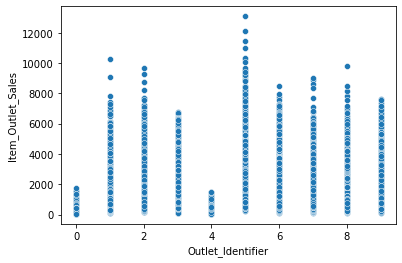

In [104]:
sns.scatterplot(data=df,x="Outlet_Identifier",y="Item_Outlet_Sales")

observation: outlet identifier 0 has maximum sales of 2000
outlet identifier 1 has maximum sales of 10000
outlet identifier 2 has maximum sales of 9750
outlet identifier 3 has maximum sales of 7000
outlet identifier 4 has maximum sales of 2000
outlet identifier 5 has maximum sales of 13000
outlet identifier 6 has maximum sales of 8000
outlet identifier 7 has maximum sales of 9000
outlet identifier 8 has maximum sales of 10000
outlet identifier  9 has maximum sales of 7000



<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

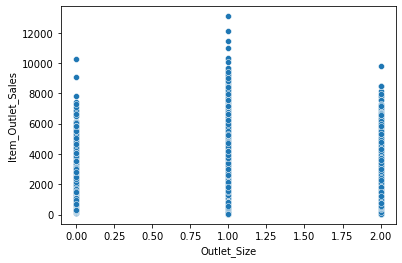

In [106]:
sns.scatterplot(data=df,x="Outlet_Size",y="Item_Outlet_Sales")

observation: outlet size 0 has outlet sales of 10250,outlet size 1 has outlet sales of 13000,outlet size 2 has outlet sales of 10000

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

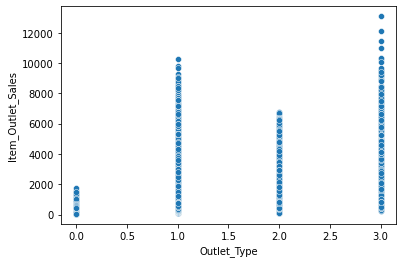

In [107]:
sns.scatterplot(data=df,x="Outlet_Type",y="Item_Outlet_Sales")

observation: outlet type of 0 has sales of nearly 2000,  
type 2 has item outlet sales of 11000,
type 3 has item outlet sales of 7000,
type 4 has item outlet sales of 13000,  

In [121]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,DRC01,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,FDN15,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,FDX07,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,NCD19,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,FDS36,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,NCJ29,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,FDN46,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [124]:
from scipy.stats import zscore
z=np.abs(zscore(df))
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [126]:
df_traindata=df[(z<3).all(axis=1)]

In [127]:
df.shape

(8523, 12)

In [128]:
df_traindata.shape

(8222, 12)

In [129]:
df_traindata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [162]:
trainx=df_traindata.drop(["Item_Outlet_Sales",],axis=1)
trainy=df_traindata["Item_Outlet_Sales"]

## scaling of data

In [166]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [167]:
dfx=sc.fit_transform(df_traindata)
dfx.mean()

6.728133370670899e-17

In [169]:
dfxx=pd.DataFrame(data=dfx,columns=df_traindata.columns)

In [170]:
x=dfxx.drop(["Item_Outlet_Sales",],axis=1)
y=dfxx["Item_Outlet_Sales"]

# EDA of test dataset

## loading the dataset

In [131]:
df_testset=pd.read_csv("bigmart_test.csv")

In [132]:
df_testset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [134]:
df_testset.shape

(5681, 11)

In [136]:
df_testset.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

the null values in the item_weight and outlet_size needs to be replaced

## imputation

In [137]:
df_testset['Item_Weight']=imp.fit_transform(df_testset['Item_Weight'].values.reshape(-1,1))

In [138]:
df_testset['Outlet_Size']=impu.fit_transform(df_testset['Outlet_Size'].values.reshape(-1,1))

In [139]:
df_testset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## label encoding

In [140]:
val1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Type','Outlet_Location_Type']

In [141]:
for i in val1:
    df_testset[i]=le.fit_transform(df_testset[i].astype(str))

In [154]:
df_traindata.shape

(8222, 12)

In [156]:
df_testset.shape

(5681, 11)

# training of model

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [171]:
def model_selection(instance):
    for i in range(0,100):
        x_train,x_test, y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        print(f" training accuracy is {r2_score(y_train,pred_train)}")
        print(f" testing accuracy is {r2_score(y_test,pred_test)}")
        print("\n")

In [172]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

 training accuracy is 0.497880089203944
 testing accuracy is 0.5021232220345797


 training accuracy is 0.5007202510030107
 testing accuracy is 0.490386026563685


 training accuracy is 0.49836715438777135
 testing accuracy is 0.5004885805634234


 training accuracy is 0.5014902046820955
 testing accuracy is 0.4880772629174702


 training accuracy is 0.4928184268998149
 testing accuracy is 0.519302357116527


 training accuracy is 0.5040393508548457
 testing accuracy is 0.4765010514929733


 training accuracy is 0.48904721441111876
 testing accuracy is 0.5362821261531714


 training accuracy is 0.5023303077869632
 testing accuracy is 0.4826196798397926


 training accuracy is 0.49851086078370654
 testing accuracy is 0.49923833609746215


 training accuracy is 0.49660850918734467
 testing accuracy is 0.5068971860788202


 training accuracy is 0.49850839260112234
 testing accuracy is 0.4996122443139135


 training accuracy is 0.4986246170166415
 testing accuracy is 0.49904190690527406




In [173]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

 training accuracy is 0.6709288379087841
 testing accuracy is 0.4956710873125755


 training accuracy is 0.6662896025762453
 testing accuracy is 0.48471772311084604


 training accuracy is 0.668113931980695
 testing accuracy is 0.496991483804606


 training accuracy is 0.6635759031819344
 testing accuracy is 0.4761731781482563


 training accuracy is 0.6539397607401585
 testing accuracy is 0.5128788587796544


 training accuracy is 0.6612695397646517
 testing accuracy is 0.4853172165364579


 training accuracy is 0.6576699987822163
 testing accuracy is 0.5255287869908891


 training accuracy is 0.6676008737090274
 testing accuracy is 0.46301918189482905


 training accuracy is 0.666331320035843
 testing accuracy is 0.4922600986576331


 training accuracy is 0.6659088976901855
 testing accuracy is 0.49591425729088157


 training accuracy is 0.6626921188322911
 testing accuracy is 0.5055991865330548


 training accuracy is 0.6622790978660766
 testing accuracy is 0.49102890174499414


 tr

 training accuracy is 0.6616911411888808
 testing accuracy is 0.509599901312167




In [181]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
model_selection(ls)

 training accuracy is 0.4978799067858205
 testing accuracy is 0.5021196168981057


 training accuracy is 0.5007200609801461
 testing accuracy is 0.4903886879997007


 training accuracy is 0.49836697547147
 testing accuracy is 0.5005002454195981


 training accuracy is 0.501490029538652
 testing accuracy is 0.48805848704533483


 training accuracy is 0.4928182417539064
 testing accuracy is 0.5192931981168791


 training accuracy is 0.5040391616365789
 testing accuracy is 0.47651623270764065


 training accuracy is 0.4890470276937393
 testing accuracy is 0.5362972360801583


 training accuracy is 0.5023301369253078
 testing accuracy is 0.48264661970662914


 training accuracy is 0.4985106746696425
 testing accuracy is 0.49923744373344825


 training accuracy is 0.4966083182498857
 testing accuracy is 0.5069043255170558


 training accuracy is 0.4985082071896463
 testing accuracy is 0.4996218694717963


 training accuracy is 0.4986244336946152
 testing accuracy is 0.4990439227155079


 tr

In [177]:
rd=Ridge(alpha=0.001)
model_selection(rd)


 training accuracy is 0.49788008920392124
 testing accuracy is 0.5021232219139351


 training accuracy is 0.5007202510029891
 testing accuracy is 0.49038603060690744


 training accuracy is 0.4983671543877495
 testing accuracy is 0.5004885806031616


 training accuracy is 0.5014902046820753
 testing accuracy is 0.48807725557957493


 training accuracy is 0.49281842689979105
 testing accuracy is 0.5193023492576991


 training accuracy is 0.5040393508548255
 testing accuracy is 0.4765010522439904


 training accuracy is 0.48904721441109433
 testing accuracy is 0.5362821270333611


 training accuracy is 0.5023303077869405
 testing accuracy is 0.48261969027026586


 training accuracy is 0.49851086078368456
 testing accuracy is 0.4992383335027455


 training accuracy is 0.49660850918732213
 testing accuracy is 0.5068971824755146


 training accuracy is 0.498508392601101
 testing accuracy is 0.4996122439131119


 training accuracy is 0.49862461701662064
 testing accuracy is 0.499041904236308

# prediction

In [182]:
pred=ls.predict(df_testset)

In [183]:
pred

array([110.48639478,  97.67919289, 189.26655251, ..., 118.86131042,
       168.03643787,  93.12477388])

In [187]:
predset=pd.DataFrame(data=df_testset,columns=dfxx.columns)

In [188]:
predset["predicted value"]=pd.DataFrame(data=pred)

In [189]:
predset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,predicted value
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1,NaN,110.486395
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1,NaN,97.679193
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0,NaN,189.266553
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1,NaN,135.266555
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3,NaN,184.843629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1,NaN,123.561033
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2,NaN,140.322701
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,1,1,1,NaN,118.861310
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,1,1,1,NaN,168.036438


# saving model

In [211]:
import pickle
filename = 'bigmartdata.pkl'
pickle.dump(ls,open(filename, 'wb'))